In [1]:
import pandas as pd

train_data = pd.read_csv("dataset/train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv("dataset/test_Y3wMUE5_7gLdaTN.csv")

print(train_data.head())
print(test_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
print(train_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
print(train_data['Loan_Status'].value_counts(normalize=True))

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


In [5]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True) # [0] is used to get the most frequent value, inplace = True is used to modify the original data
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(), inplace = True)


In [6]:
from sklearn.preprocessing import LabelEncoder

train_data['Loan_Status'] = train_data['Loan_Status'].map({"Y": 1, "N": 0})

categorical_columns = ['Gender', "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
encoder = LabelEncoder()

for col in categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col])

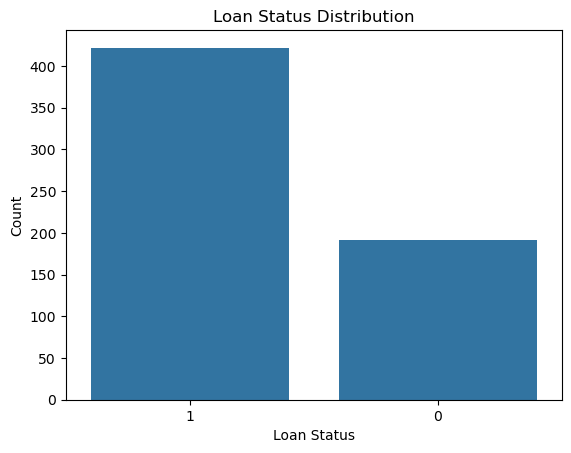

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = train_data, x = train_data['Loan_Status'].astype(str))
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
%matplotlib inline
plt.show()

In [8]:
print(train_data["Loan_Status"])

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


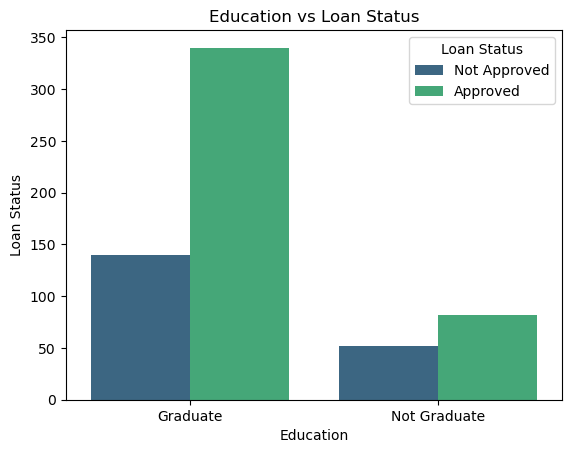

In [9]:
sns.countplot(data = train_data, x = train_data["Education"].map({0: "Graduate", 1 : "Not Graduate"}), hue = "Loan_Status", palette = "viridis")
plt.title("Education vs Loan Status")
plt.xlabel("Education")
plt.ylabel("Loan Status")
plt.legend(title = "Loan Status", labels = ["Not Approved", "Approved"])
%matplotlib inline
plt.show()

In [10]:
train_data["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

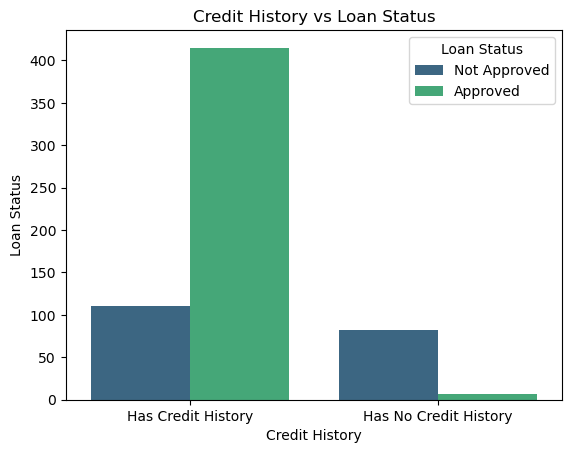

In [11]:
sns.countplot(data = train_data, x = train_data['Credit_History'].map({0: "Has No Credit History", 1: "Has Credit History"}), hue = "Loan_Status", palette = "viridis")
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Loan Status')
plt.legend(title = 'Loan Status', labels = ['Not Approved', 'Approved'])
%matplotlib inline
plt.show()

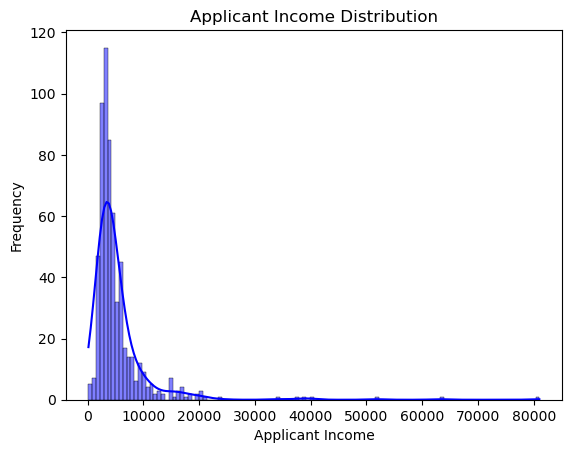

In [12]:
sns.histplot(train_data['ApplicantIncome'], kde = True, color = 'blue')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
%matplotlib inline
plt.show()

/tmp/ipykernel_89467/3640434651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train_data, x = 'Loan_Status', y = 'LoanAmount', palette = 'viridis')


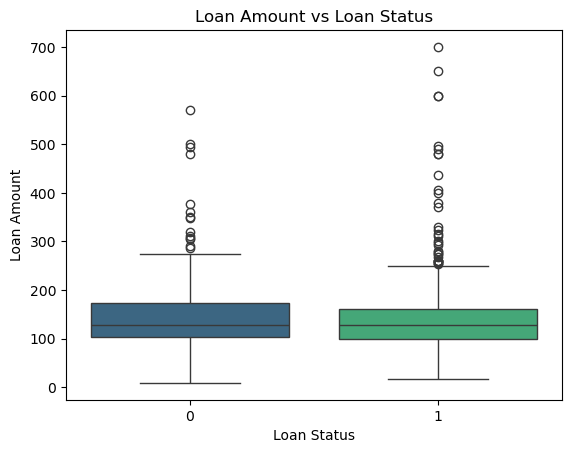

In [13]:
sns.boxplot(data = train_data, x = 'Loan_Status', y = 'LoanAmount', palette = 'viridis')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
%matplotlib inline
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

X = train_data.drop(columns = ['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Scaled DataFrame:")
print(X.head())

Scaled DataFrame:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0         0.072991   
1       1        1           1          0              0        -0.134412   
2       1        1           0          0              1        -0.393747   
3       1        1           0          1              0        -0.462062   
4       1        0           0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231             1.0   
1          -0.038732   -0.211241          0.273231             1.0   
2          -0.554487   -0.948996          0.273231             1.0   
3           0.251980   -0.306435          0.273231             1.0   
4          -0.554487   -0.056551          0.273231             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4  

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
y_train.shape, y_test.shape

(491, 11) (123, 11)


((491,), (123,))

Logistic Regression

Accuracy Score: 0.7886178861788617

Classifivation Report:               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



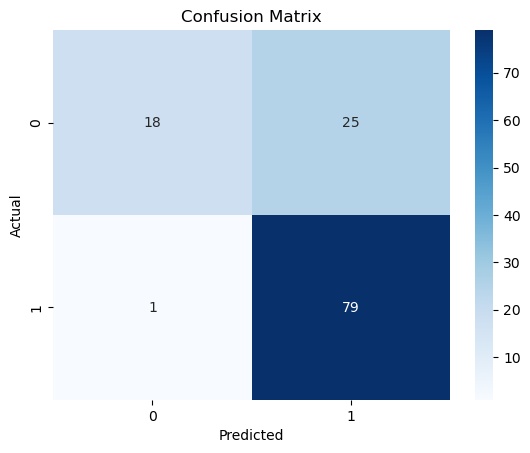

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train) 

y_pred_lr = lr_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lr)}")
print(f"\nClassifivation Report: {classification_report(y_test, y_pred_lr)}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt = 'd') # annot = True to display the values on the heatmap, fmt = 'd' to display the values in integer format
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline
plt.show()

Random Forest Classifier

Accuracy Score: 0.7560975609756098

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



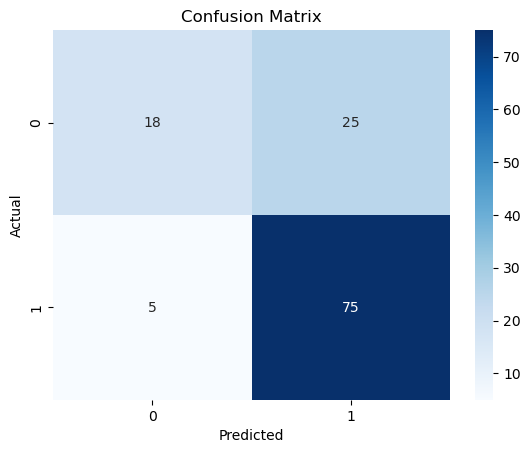

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf)}")
print(f"\nClassification Report: {classification_report(y_test, y_pred_rf)}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
%matplotlib inline
plt.show()

XGBoost Classifier

Accuracy Score: 0.7398373983739838

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



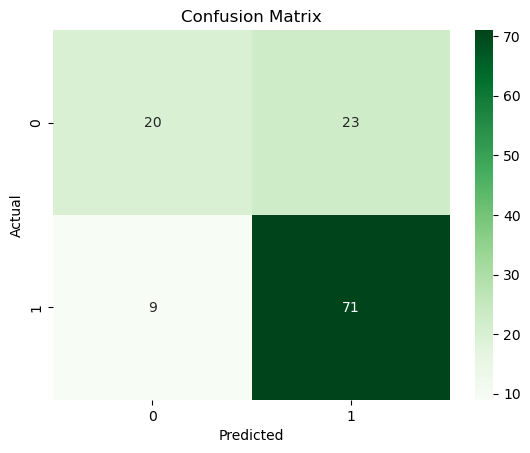

In [20]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder = False, 
                          eval_metric = 'logloss', 
                          random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}")
print(f"\nClassification Report: {classification_report(y_test, y_pred_xgb)}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, cmap = 'Greens', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline
plt.show()

LightGBM Classifier

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

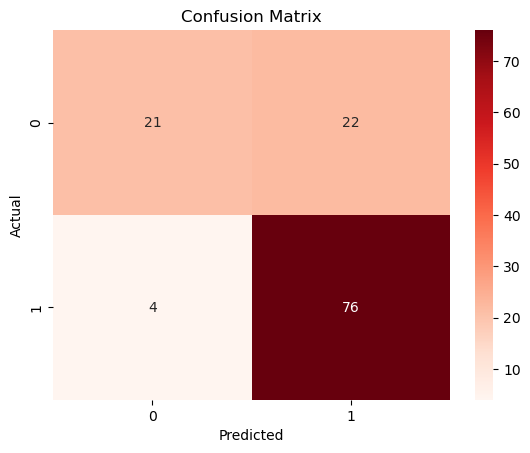

In [21]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state = 42)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lgbm)}")
print(f"\nClassification Report: {classification_report(y_test, y_pred_lgbm)}")

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot = True, cmap = 'Reds', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline
plt.show()

SVM Classifier

SVM Accuracy: 0.7886178861788617

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



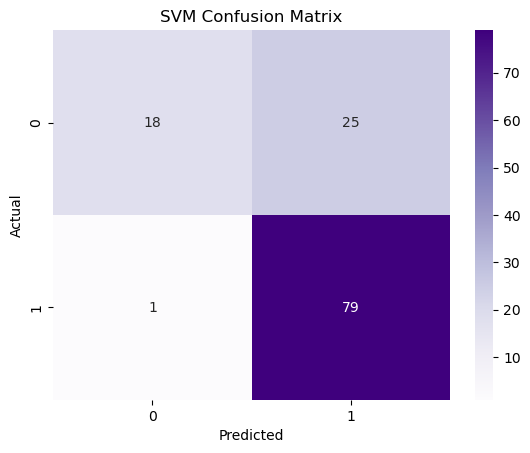

In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(X_resampled.shape, y_resampled.shape)

(684, 11) (684,)
0    342
1    342
Name: Loan_Status, dtype: int64


SMOTE Logistric Regression

In [26]:
lr_model.fit(X_resampled, y_resampled)
y_pred_lr_res = lr_model.predict(X_test)

print("Logistic Regression (After SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_res)}")
print(classification_report(y_test, y_pred_lr_res))


Logistic Regression (After SMOTE):
Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



SMOTE Random Forest

In [27]:
rf_model.fit(X_resampled, y_resampled)
y_pred_rf_res = rf_model.predict(X_test)

print("Random Forest (After SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_res)}")
print(classification_report(y_test, y_pred_rf_res))


Random Forest (After SMOTE):
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        43
           1       0.75      0.88      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.67      0.68       123
weighted avg       0.72      0.73      0.72       123



SMOTE XGBoost

In [28]:
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb_res = xgb_model.predict(X_test)

print("XGBoost (After SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_res)}")
print(classification_report(y_test, y_pred_xgb_res))


XGBoost (After SMOTE):
Accuracy: 0.7398373983739838
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.77      0.86      0.81        80

    accuracy                           0.74       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.73      0.74      0.73       123



SMOTE LightGBM

In [29]:
lgbm_model.fit(X_resampled, y_resampled)
y_pred_lgbm_res = lgbm_model.predict(X_test)

print("LightGBM (After SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm_res)}")
print(classification_report(y_test, y_pred_lgbm_res))


[LightGBM] [Info] Number of positive: 342, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

SMOTE SVM

In [30]:
svm_model.fit(X_resampled, y_resampled)
y_pred_svm_res = svm_model.predict(X_test)

print("SVM (After SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_res)}")
print(classification_report(y_test, y_pred_svm_res))

SVM (After SMOTE):
Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Class Weigth**

In [ ]:
lr_model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
lr_model_balanced.fit(X_resampled, y_resampled)

y_pred_lr_balanced = lr_model_balanced.predict(X_test)

print("Logistic Regression (Class Weight 'balanced'):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_balanced)}")
print(classification_report(y_test, y_pred_lr_balanced))


Logistic Regression (Class Weight 'balanced'):
Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



In [32]:
rf_model_balanced = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model_balanced.fit(X_resampled, y_resampled)

y_pred_rf_balanced = rf_model_balanced.predict(X_test)

print("Random Forest (Class Weight 'balanced'):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_balanced)}")
print(classification_report(y_test, y_pred_rf_balanced))


Random Forest (Class Weight 'balanced'):
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        43
           1       0.75      0.88      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.67      0.68       123
weighted avg       0.72      0.73      0.72       123



**Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                       param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_resampled, y_resampled)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

print("Random Forest (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned)}")
print(classification_report(y_test, y_pred_rf_tuned))


Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest (Tuned):
Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



**Ensemble Model (Voting Classifier)**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', lr_model_balanced),
    ('rf', best_rf),
    ('lgbm', lgbm_model)
], voting='hard')

voting_clf.fit(X_resampled, y_resampled)
y_pred_voting = voting_clf.predict(X_test)

print("Ensemble Model (Voting Classifier):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))

[LightGBM] [Info] Number of positive: 342, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [35]:
import joblib
import os

os.makedirs("model", exist_ok=True)
joblib.dump(voting_clf, 'model/voting_classifier.pkl')


['model/voting_classifier.pkl']